# ******************************************
# * 3_Point_Position_Estimation 
## * Ali Soltan Mohammdi
### * Fall 2023
### ali.s.mohammadi@znu.ac.ir
# ******************************************

## Exercise description

#### In this exercise, we consider three sensor nodes located at arbitrary coordinates. The algorithm takes as inputs the coordinates and communication radius of these nodes. Our objective is to draw a triangle by connecting these three points. We will then draw perpendiculars from each side of the triangle, which intersect at a point denoted as Z. Our goal is to determine if point Z falls within the communication range of any of the nodes. The algorithm's output includes the coordinates of point Z, the number of nodes whose communication range includes Z (denoted as K), and the names of these nodes. Additionally, a graph illustrating the nodes and point Z is drawn on the coordinate axis.

Enter the x-coordinate of Node A:  0
Enter the y-coordinate of Node A:  4
Enter the comunication radius of Node A:  6
Enter the x-coordinate of Node B:  3
Enter the y-coordinate of Node B:  0
Enter the comunication radius of Node B:  5
Enter the x-coordinate of Node C:  -4
Enter the y-coordinate of Node C:  0
Enter the comunication radius of Node C:  7


The coordinates of point Z are (-0.50, 0.50).
Point Z is inside 3 circle(s): Node A, Node B, Node C.


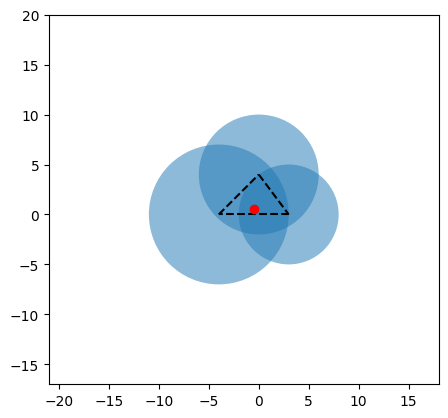

In [17]:
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Calculate midpoint
def calculate_midpoint(x1, y1, x2, y2):
    midpoint_x = (x1 + x2) / 2
    midpoint_y = (y1 + y2) / 2
    return midpoint_x, midpoint_y
    
# Calculate perpendicular bisector
def calculate_perpendicular_bisector_slope(x1, y1, x2, y2):
    if x2 - x1 == 0:
        return 1e12  # return a very large slope value for vertical lines
    else:
        slope =0.0000000001 + (y2 - y1) / (x2 - x1 + 0.000000001)
        perpendicular_slope = -1 / slope
        return perpendicular_slope

# Calculate distance
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


# Calculate perpendicular bisector intercept
def calculate_perpendicular_bisector_intercept(x1, y1, x2, y2):
    midpoint_x, midpoint_y = calculate_midpoint(x1, y1, x2, y2)
    slope = calculate_perpendicular_bisector_slope(x1, y1, x2, y2)
    intercept = midpoint_y - slope * midpoint_x
    return intercept

# calculate perpendicular bisector intercept
def calculate_intersection_point(x1, y1, r1, x2, y2, r2, x3, y3, r3):
    m1 = calculate_perpendicular_bisector_slope(x2, y2, x3, y3)
    b1 = calculate_perpendicular_bisector_intercept(x2, y2, x3, y3)
    m2 = calculate_perpendicular_bisector_slope(x1, y1, x3, y3)
    b2 = calculate_perpendicular_bisector_intercept(x1, y1, x3, y3)
    m3 = calculate_perpendicular_bisector_slope(x1, y1, x2, y2)
    b3 = calculate_perpendicular_bisector_intercept(x1, y1, x2, y2)

    x = 0.000000001 + (b3 - b2) / (m2 - m3 + 0.000000001)
    y = m2 * x + b2

    return x, y

# calculate circles inclusion
def calculate_circles_inclusion(x1, y1, r1, x2, y2, r2, x3, y3, r3):
    Z = calculate_intersection_point(x1, y1, r1, x2, y2, r2, x3, y3, r3)

    circles = []
    if calculate_distance(x1, y1, Z[0], Z[1]) <= r1:
        circles.append("Node A")
    if calculate_distance(x2, y2, Z[0], Z[1]) <= r2:
        circles.append("Node B")
    if calculate_distance(x3, y3, Z[0], Z[1]) <= r3:
        circles.append("Node C")

    return Z[0], Z[1], len(circles), circles


# Take inputs from the user
x1 = float(input("Enter the x-coordinate of Node A: "))
y1 = float(input("Enter the y-coordinate of Node A: "))
r1 = float(input("Enter the comunication radius of Node A: "))

x2 = float(input("Enter the x-coordinate of Node B: "))
y2 = float(input("Enter the y-coordinate of Node B: "))
r2 = float(input("Enter the comunication radius of Node B: "))

x3 = float(input("Enter the x-coordinate of Node C: "))
y3 = float(input("Enter the y-coordinate of Node C: "))
r3 = float(input("Enter the comunication radius of Node C: "))

# Calculate the coordinates of point Z and the number of circles that include point Z
Z = calculate_circles_inclusion(x1, y1, r1, x2, y2, r2, x3, y3, r3)

# Print the output
print(f"The coordinates of point Z are ({Z[0]:.2f}, {Z[1]:.2f}).")
if Z[2] == 0:
    print("Point Z is not inside any Node.")
else:
    print(f"Point Z is inside {Z[2]} circle(s): {', '.join(Z[3])}.")

# Draw the diagram
fig, ax = plt.subplots()

ax.set_aspect('equal')
ax.set_xlim(min(x1-r1,x2-r2,x3-r3)-10,max(x1+r1,x2+r2,x3+r3)+10)
ax.set_ylim(min(y1-r1,y2-r2,y3-r3)-10,max(y1+r1,y2+r2,y3+r3)+10)

circle_A = Circle((x1,y1),r1,alpha=0.5)
circle_B = Circle((x2,y2),r2,alpha=0.5)
circle_C = Circle((x3,y3),r3,alpha=0.5)

ax.add_patch(circle_A)
ax.add_patch(circle_B)
ax.add_patch(circle_C)

ax.plot([x1,x2],[y1,y2],'k--')
ax.plot([x2,x3],[y2,y3],'k--')
ax.plot([x3,x1],[y3,y1],'k--')

ax.plot(Z[0],Z[1],'ro')

plt.show()